## 0. How to use the module hmm?
### 0.1 Data preparation -- read text data and initial matrix configuration

In [1]:
import sys, os
sys.path.insert(0, 'python')
import hmm

# read file textA and textB
with open(os.path.join('data', 'textA.txt')) as f:
    train_data = f.read()
with open(os.path.join('data', 'textB.txt')) as f:
    test_data = f.read()

def read_matrix(filename):
    fin = open(filename)
    ret = []
    while True:
        line = fin.readline()
        if line == '':
            break
        if line[-1] == '\n':
            line = line[:-1]
        line = line.split()
        ret.append([])
        for number in line:
            ret[-1].append(float(number))
    fin.close()
    return ret

init_trans_mat = read_matrix(os.path.join('config', 'init_trans_mat_2'))
init_emiss_mat = read_matrix(os.path.join('config', 'init_emiss_mat_2'))

### 0.2 Initialize, train, and evaluate the model

In [2]:
model = hmm.model(init_trans_mat, init_emiss_mat)
model.read('data/textA.txt')
print 'The average log-probability {:.3f} before training'.format(model.eval())
model.train()
print 'The average log-probability {:.3f} after one iteration of training'.format(model.eval())

The average log-probability -3.297 before training
The average log-probability -2.857 after one iteration of training


### 0.3 Access the probability matrix

In [3]:
print (model.trans_mat) # [prev][next]
print (model.emiss_mat) # [state][output]

[[0.48996344057465835, 0.5100365594253417], [0.5099634680993417, 0.49003653190065827]]
[[0.06764641394356054, 0.012417559351607797, 0.028630267308800587, 0.03588786771119927, 0.10486572362666322, 0.01817660980288215, 0.014581370982052373, 0.03718584775132977, 0.057825637550776576, 0.0027298131527187615, 0.0044943132560294205, 0.03905084221421677, 0.019175759618762188, 0.054210959734951915, 0.06512522968159759, 0.01932742600168313, 0.0008345075664210368, 0.05340956842339948, 0.056246742231487554, 0.07801139673940617, 0.022765398361373094, 0.00807833772940339, 0.013252288993905303, 0.002804075794709222, 0.01398660878547985, 0.00046735095329153057, 0.16881208273229154], [0.0678202402671848, 0.012449105054579643, 0.02870306080834866, 0.03597879244004875, 0.1051342571309566, 0.01822338684520229, 0.014618626348329462, 0.03728081211044935, 0.05797435179276554, 0.0027368530094909267, 0.00450568592903578, 0.039149150741261705, 0.019224236907487223, 0.05405571805591103, 0.0649414501542099, 0.019

## Question 1
### 1.a What would happen if all probabilities were set to be uniform, i.e 1/2 and 1/27 ?

In [4]:
init_trans_mat = read_matrix(os.path.join('config', 'init_trans_mat_2_even'))
init_emiss_mat = read_matrix(os.path.join('config', 'init_emiss_mat_2_even'))

model = hmm.model(init_trans_mat, init_emiss_mat)
model.read('data/textA.txt')
print 'Before training'
print (model.trans_mat)
print (model.emiss_mat)
model.train()
print 'After training for 1 iteration'
print (model.trans_mat)
print (model.emiss_mat)
model.train()
print 'After training for 2 iteration'
print (model.trans_mat)
print (model.emiss_mat)
model.train()
print 'After training for 3 iteration'
print (model.trans_mat)
print (model.emiss_mat)

Before training
[[0.5, 0.5], [0.5, 0.5]]
[[0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37], [0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37]]
After training for 1 iteration
[[0.5, 0.5], [0.5, 0.5]]
[[0.06773333333333334, 0.012433333333333333, 0.028666666666666667, 0.03593333333333333, 0.105, 0.0182, 0.0146, 0.037233333333333334, 0.0579, 0.0027333333333333333, 0.0045, 0.0391, 0.0192, 0.05413333333333333, 0.06503333333333333, 0.0193, 0.0008333333333333334, 0.05333333333333334, 0.05616666666666666, 0.0779, 0.022733333333333335, 0.008066666666666666, 0.013233333333333333, 0.0028, 0.013966666666666667, 0.00046666666666666666, 0.1688], [0.06773333333333334, 0.012433333333333333, 0.028666666666666667, 0.03593333333333333, 0.105, 0.0182, 0.0146, 0.037233333333333334, 0.

### 1.b Plot the average log-probability of the training and test data after k iterations

In [5]:
# Gather data
init_trans_mat = read_matrix(os.path.join('config', 'init_trans_mat_2'))
init_emiss_mat = read_matrix(os.path.join('config', 'init_emiss_mat_2'))

modela = hmm.model(init_trans_mat, init_emiss_mat)
modela.read(os.path.join('data', 'textA.txt'))
modelb = hmm.model(init_trans_mat, init_emiss_mat)
modelb.read(os.path.join('data', 'textB.txt'))
eval_a, eval_b = [], []
while len(eval_a) <= 600:
    eval_a.append(modela.eval())
    eval_b.append(modelb.eval())
    modela.train()
    modelb.trans_mat = modela.trans_mat
    modelb.emiss_mat = modela.emiss_mat

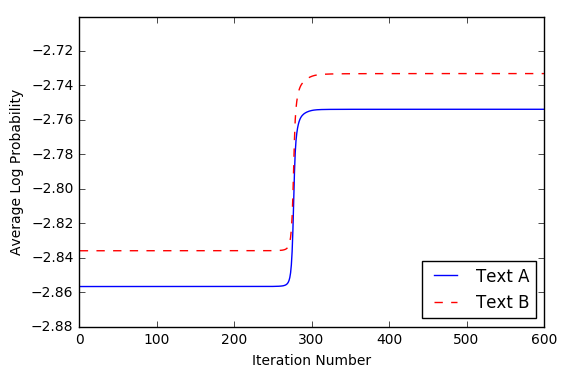

-2.75387243528
-2.73314462773


In [6]:
import matplotlib.pyplot as plt
eval_x = [x for x in range(1,601)]
plota, = plt.plot(eval_x, eval_a[1:], 'b-')
plotb, = plt.plot(eval_x, eval_b[1:], 'r--')
plt.legend([plota, plotb], ["Text A", "Text B"], loc=4)
plt.ylabel('Average Log Probability')
plt.xlabel('Iteration Number')
plt.axis([0, 600, -2.88, -2.7])
plt.savefig(os.path.join('results', '1.b.pdf'))
plt.show()
print (eval_a[-1])
print (eval_b[-1])

### 1.c Plot the emission probabilities of a few particular letters for each state

In [7]:
# Gather data
init_trans_mat = read_matrix(os.path.join('config', 'init_trans_mat_2'))
init_emiss_mat = read_matrix(os.path.join('config', 'init_emiss_mat_2'))

model = hmm.model(init_trans_mat, init_emiss_mat)
model.read(os.path.join('data', 'textA.txt'))

prob_1_a, prob_2_a, prob_1_n, prob_2_n = [], [], [], []
for i in range(600):
    model.train()
    prob_1_a.append(model.emiss_mat[0][ord('a') - ord('a')])
    prob_2_a.append(model.emiss_mat[1][ord('a') - ord('a')])
    prob_1_n.append(model.emiss_mat[0][ord('n') - ord('a')])
    prob_2_n.append(model.emiss_mat[1][ord('n') - ord('a')])

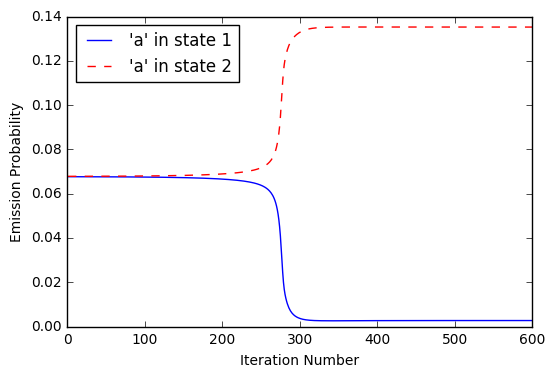

In [8]:
import matplotlib.pyplot as plt
prob_x = [x for x in range(1,601)]
plot1a, = plt.plot(prob_x, prob_1_a, 'b-')
plot2a, = plt.plot(prob_x, prob_2_a, 'r--')
plt.legend([plot1a, plot2a], ["'a' in state 1", "'a' in state 2"], loc=2)
plt.ylabel('Emission Probability')
plt.xlabel('Iteration Number')
plt.savefig(os.path.join('results', '1.c.a.pdf'))
plt.show()

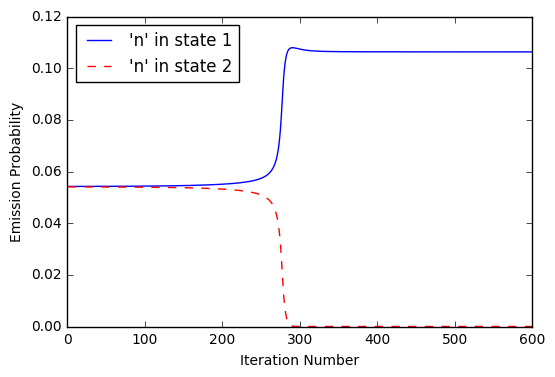

In [9]:
prob_x = [x for x in range(1,601)]
plot1n, = plt.plot(prob_x, prob_1_n, 'b-')
plot2n, = plt.plot(prob_x, prob_2_n, 'r--')
plt.legend([plot1n, plot2n], ["'n' in state 1", "'n' in state 2"], loc=2)
plt.ylabel('Emission Probability')
plt.xlabel('Iteration Number')
plt.savefig(os.path.join('results', '1.c.n.pdf'))
plt.show()

### 1.d  Study the emission probability distributions $q_{600}(\cdot|s_1)$ and $q_{600}(\cdot|s_2)$ to see where they differ the most, as well as how the transition probabilities differ from their initial values. Try to explain what the machine has learned about English text.

In [10]:
# Gather data
init_trans_mat = read_matrix(os.path.join('config', 'init_trans_mat_2'))
init_emiss_mat = read_matrix(os.path.join('config', 'init_emiss_mat_2'))

model = hmm.model(init_trans_mat, init_emiss_mat)
model.read(os.path.join('data', 'textA.txt'))

for i in range(600):
    model.train()
    
print model.trans_mat
print model.emiss_mat

[[0.2863344113661471, 0.7136655886338529], [0.7405482614352163, 0.25945173856478365]]
[[0.0026914312143014626, 0.024414990339291627, 0.05618141446205272, 0.07056128575269806, 5.38058146213024e-44, 0.035738833043574336, 0.02866961332025981, 0.07197473373760918, 3.1195984458346214e-77, 0.005367370530353655, 0.008101323696336054, 0.07677957061451875, 0.037702505188825675, 0.1063001187962724, 2.053175745329571e-37, 0.03789887240335081, 0.0016363934543761145, 0.10472918108007133, 0.11029291882495011, 0.1452887941398875, 3.0789206483013767e-53, 0.01584028863836079, 0.025985928055492696, 0.0054982820067037445, 0.02742595429534368, 0.000916380334450624, 3.8160708884016165e-06], [0.13522714068216815, 8.745958332162454e-103, 0.00011468668989778889, 4.787330491064511e-47, 0.21395821832913342, 7.780573293545209e-157, 4.249711471833059e-13, 0.0011822753303910194, 0.11798267467863643, 1.1446805575434704e-190, 0.0007629160611498408, 1.0651763940670202e-08, 1.938292546831474e-93, 5.043396704542136e-69

## Question 2
### 2.a What would happen if all probabilities were set to be uniform, i.e 1/2 and 1/27 ?

In [11]:
init_trans_mat = read_matrix(os.path.join('config', 'init_trans_mat_4_even'))
init_emiss_mat = read_matrix(os.path.join('config', 'init_emiss_mat_4_even'))

model = hmm.model(init_trans_mat, init_emiss_mat)
model.read('data/textA.txt')
print 'Before training'
print (model.trans_mat)
print (model.emiss_mat)
model.train()
print 'After training for 1 iteration'
print (model.trans_mat)
print (model.emiss_mat)
model.train()
print 'After training for 2 iteration'
print (model.trans_mat)
print (model.emiss_mat)
model.train()
print 'After training for 3 iteration'
print (model.trans_mat)
print (model.emiss_mat)

Before training
[[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]
[[0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37], [0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37], [0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37], [0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37]]
After training for 1 iteration
[[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]
[[0.06773333333333334, 0.012433333333333333, 0.028666666666666667, 0.03593333333333333

### 2.b Plot the average log-probability of the training and test data after k iterations

In [12]:
# Gather data
init_trans_mat = read_matrix(os.path.join('config', 'init_trans_mat_4'))
init_emiss_mat = read_matrix(os.path.join('config', 'init_emiss_mat_4'))

modela = hmm.model(init_trans_mat, init_emiss_mat)
modela.read(os.path.join('data', 'textA.txt'))
modelb = hmm.model(init_trans_mat, init_emiss_mat)
modelb.read(os.path.join('data', 'textB.txt'))
eval_a, eval_b = [], []
while len(eval_a) <= 600:
    eval_a.append(modela.eval())
    eval_b.append(modelb.eval())
    modela.train()
    modelb.trans_mat = modela.trans_mat
    modelb.emiss_mat = modela.emiss_mat

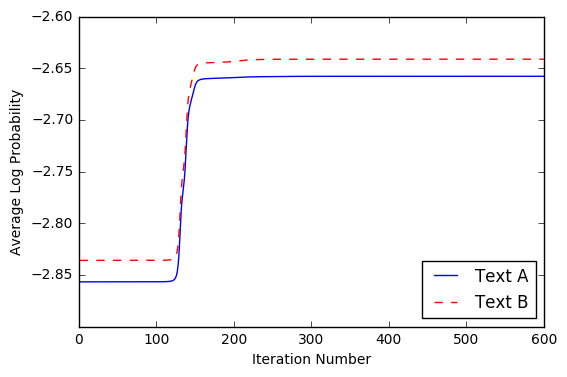

In [13]:
import matplotlib.pyplot as plt
eval_x = [x for x in range(1,601)]
plota, = plt.plot(eval_x, eval_a[1:], 'b-')
plotb, = plt.plot(eval_x, eval_b[1:], 'r--')
plt.legend([plota, plotb], ["Text A", "Text B"], loc=4)
plt.ylabel('Average Log Probability')
plt.xlabel('Iteration Number')
plt.axis([0, 600, -2.9, -2.6])
plt.savefig(os.path.join('results', '2.b.pdf'))
plt.show()

### 2.c Plot the emission probabilities of a few particular letters for each state

In [14]:
# Gather data
init_trans_mat = read_matrix(os.path.join('config', 'init_trans_mat_4'))
init_emiss_mat = read_matrix(os.path.join('config', 'init_emiss_mat_4'))

model = hmm.model(init_trans_mat, init_emiss_mat)
model.read(os.path.join('data', 'textA.txt'))

prob_1_a, prob_2_a, prob_1_n, prob_2_n = [], [], [], []
prob_3_a, prob_4_a, prob_3_n, prob_4_n = [], [], [], []
for i in range(600):
    model.train()
    prob_1_a.append(model.emiss_mat[0][ord('a') - ord('a')])
    prob_2_a.append(model.emiss_mat[1][ord('a') - ord('a')])
    prob_3_a.append(model.emiss_mat[2][ord('a') - ord('a')])
    prob_4_a.append(model.emiss_mat[3][ord('a') - ord('a')])
    prob_1_n.append(model.emiss_mat[0][ord('n') - ord('a')])
    prob_2_n.append(model.emiss_mat[1][ord('n') - ord('a')])
    prob_3_n.append(model.emiss_mat[2][ord('n') - ord('a')])
    prob_4_n.append(model.emiss_mat[3][ord('n') - ord('a')])

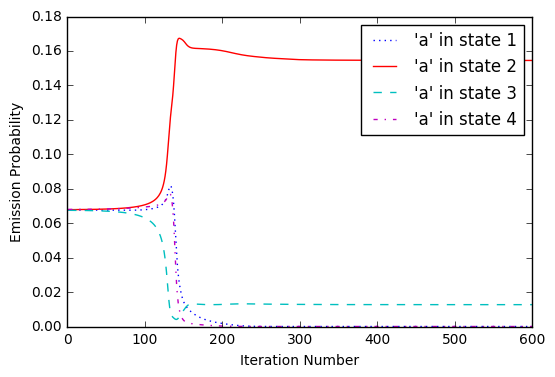

In [15]:
import matplotlib.pyplot as plt
prob_x = [x for x in range(1,601)]
plot1a, = plt.plot(prob_x, prob_1_a, 'b:')
plot2a, = plt.plot(prob_x, prob_2_a, 'r-')
plot3a, = plt.plot(prob_x, prob_3_a, 'c--')
plot4a, = plt.plot(prob_x, prob_4_a, 'm-.')
plt.legend([plot1a, plot2a, plot3a, plot4a], ["'a' in state 1", "'a' in state 2", 
                                              "'a' in state 3", "'a' in state 4"], loc=1)
plt.ylabel('Emission Probability')
plt.xlabel('Iteration Number')
plt.savefig(os.path.join('results', '2.c.a.pdf'))
plt.show()

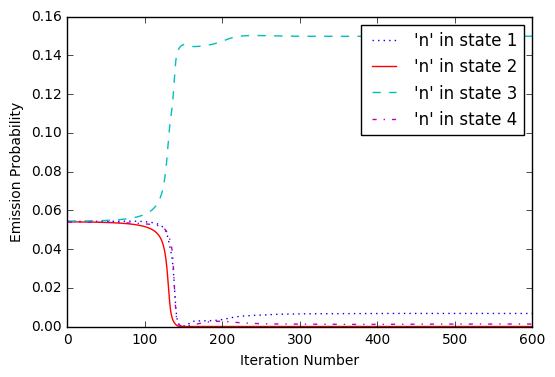

In [16]:
import matplotlib.pyplot as plt
prob_x = [x for x in range(1,601)]
plot1n, = plt.plot(prob_x, prob_1_n, 'b:')
plot2n, = plt.plot(prob_x, prob_2_n, 'r-')
plot3n, = plt.plot(prob_x, prob_3_n, 'c--')
plot4n, = plt.plot(prob_x, prob_4_n, 'm-.')
plt.legend([plot1n, plot2n, plot3n, plot4n], ["'n' in state 1", "'n' in state 2", 
                                              "'n' in state 3", "'n' in state 4"], loc=1)
plt.ylabel('Emission Probability')
plt.xlabel('Iteration Number')
plt.savefig(os.path.join('results', '2.c.n.pdf'))
plt.show()

### 2.d Study the emission probability distributions  to see where they differ the most, as well as how the transition probabilities differ from their initial values. Try to explain what the machine has learned about English text.

In [17]:
# Gather data
init_trans_mat = read_matrix(os.path.join('config', 'init_trans_mat_4'))
init_emiss_mat = read_matrix(os.path.join('config', 'init_emiss_mat_4'))

model = hmm.model(init_trans_mat, init_emiss_mat)
model.read(os.path.join('data', 'textA.txt'))

for i in range(600):
    model.train()
    
print model.trans_mat
print model.emiss_mat

[[0.055466662974201525, 0.9445333369456825, 8.011592896875316e-11, 3.731493962628075e-18], [2.4985077951693244e-57, 0.11325748588666672, 0.8272782289434614, 0.05946428516987194], [0.15580582165279858, 0.5124609913412822, 0.04698449231431765, 0.2847486946916015], [0.38584371569810466, 0.6141562739096329, 6.864212880001918e-82, 1.039226252212941e-08]]
[[4.4000319971362927e-29, 0.0008745756994967714, 7.87077280136626e-136, 1.1949978778126888e-44, 0.3300532527752839, 0.0035524333628983353, 1.1164767096012606e-106, 1.0698377569191302e-16, 0.05140497185928938, 1.442999865370368e-56, 1.5272542263111014e-98, 0.026879021765604662, 0.03186516053101213, 0.006723391676973632, 0.10588744464563282, 2.2116944728769055e-92, 4.990145422167646e-80, 0.072916755096245, 0.08739196966815643, 0.029074960539843455, 0.004539054347100026, 0.0008505770934742051, 0.0066351041339428865, 0.0, 0.056865192853088026, 0.0005400980250911496, 0.18394603592686284], [0.15447937603697018, 8.140077541381554e-194, 5.866922879

## Question 3
### 3.1 Data preparation

In [18]:
import random as rd, os

rd.seed(1)
gamma_sum, gamma = 0.0, []
for i in range(27):
    gamma.append(rd.random())
    gamma_sum += gamma[-1]
gamma_sum /= 27
for i in range(27):
    gamma[i] -= gamma_sum

fin = open(os.path.join('data', 'textA.txt'))
line = fin.read()
letter_cnt = [0 for i in range(27)]
letter_tot = len(line)
for letter in line:
    if letter == ' ':
        letter_cnt[26] += 1
    else:
        letter_cnt[ord(letter) - ord('a')] += 1
for i in range(27):
    letter_cnt[i] = letter_cnt[i] / float(letter_tot)
emiss_state_1, emiss_state_2 = [], []
for i in range(27):
    emiss_state_1.append(letter_cnt[i] - 0.003 * gamma[i])
    emiss_state_2.append(letter_cnt[i] + 0.003 * gamma[i])
print emiss_state_1
print emiss_state_2

[0.06870456899553411, 0.011265360517059604, 0.02774967120427479, 0.03654245465065303, 0.10488802313326215, 0.018225855200171753, 0.014019549476369679, 0.03624149167446476, 0.05899274963421526, 0.004022619298305283, 0.003367033082778359, 0.03917602719082281, 0.01828748814716414, 0.05550134356781797, 0.0650715001457069, 0.018509708297515623, 0.0015213750640599437, 0.05187184964120954, 0.05483671268837018, 0.0791825584454373, 0.024031324144890922, 0.007816757642824145, 0.01179021423953577, 0.003030715681473331, 0.014691196869812795, 0.0005746453344564832, 0.17008720603181338]
[0.06676209767113257, 0.013601306149607062, 0.029583662129058542, 0.03532421201601363, 0.10511197686673784, 0.01817414479982825, 0.015180450523630321, 0.038225174992201905, 0.05680725036578474, 0.0014440473683613839, 0.00563296691722164, 0.039023972809177195, 0.020112511852835857, 0.052765323098848696, 0.06499516652095977, 0.02009029170248438, 0.00014529160260672296, 0.05479481702545713, 0.057496620644963144, 0.07661

In [19]:
init_emiss_mat = [
    emiss_state_1,
    emiss_state_2
]
init_trans_mat = read_matrix(os.path.join('config', 'init_trans_mat_2'))

modela = hmm.model(init_trans_mat, init_emiss_mat)
modela.read(os.path.join('data', 'textA.txt'))
modelb = hmm.model(init_trans_mat, init_emiss_mat)
modelb.read(os.path.join('data', 'textB.txt'))
eval_a, eval_b = [], []
while len(eval_a) <= 600:
    eval_a.append(modela.eval())
    eval_b.append(modelb.eval())
    modela.train()
    modelb.trans_mat = modela.trans_mat
    modelb.emiss_mat = modela.emiss_mat

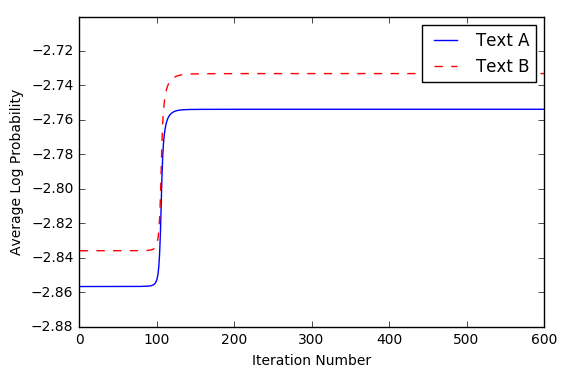

-2.75387238981
-2.73314754073


In [20]:
import matplotlib.pyplot as plt
eval_x = [x for x in range(1,601)]
plota, = plt.plot(eval_x, eval_a[1:], 'b-')
plotb, = plt.plot(eval_x, eval_b[1:], 'r--')
plt.legend([plota, plotb], ["Text A", "Text B"], loc=1)
plt.ylabel('Average Log Probability')
plt.xlabel('Iteration Number')
plt.axis([0, 600, -2.88, -2.7])
plt.savefig(os.path.join('results', '3.pdf'))
plt.show()
print (eval_a[-1])
print (eval_b[-1])